In [2]:
import numpy as np

from typing import List, Union

### Binary Search 
`Complexity: LogN`

In [18]:
# Binary Search 
def apply_binary_search(arr: Union[List, np.ndarray], item: int):
    """
    Apply binary search algorithm.
    ! Input array must be sorted.
    
    Parameters
    ----------
    arr: list or np.ndarray
        Array to search in.
    item: int
        Element to find.
    
    Returns
    -------
    tuple
        Counter and an index of a searching element.
    """
    cnt = 0 # to check how many tries
    low_indx = 0 
    high_indx = len(arr) - 1
    while low_indx <= high_indx:
        mid_indx = (low_indx + high_indx)//2
        guess = arr[mid_indx]
        if guess == item:
            cnt += 1 
            return mid_indx, cnt 
        if guess > item:
            cnt += 1 
            high_indx = mid_indx - 1
        else:
            cnt += 1 
            low_indx = mid_indx + 1
    return None, cnt

# test
sample_lst = [1, 3, 5, 7, 9]
res = apply_binary_search(sample_lst, 9)
print(f'Searched Element Index: {res[0]}, N Tries: {res[1]}')

Searched Element Index: 4, N Tries: 3


In [12]:
def apply_binary_search(arr: Union[List, np.ndarray], item: int) -> Union[None, int]:
    left_pointer = 0
    right_pointer = len(arr) - 1
    while left_pointer <= right_pointer:
        mid_pointer = (left_pointer + right_pointer)//2
        if arr[mid_pointer] == item:
            return mid_pointer
        if arr[mid_pointer] < item:
            left_pointer = mid_pointer + 1
        else:
            right_pointer = mid_pointer - 1
    return None

# test 
nums = [-1, 0, 3, 5, 9, 12]
apply_binary_search(nums, 9)

4

### Selection Sort
`Complexity: N^2`

In [56]:
# Selection Sort (ASC order )
sample = [4, 2, 7, 0]
print('Initial Array: ', sample)


# Intermidiate function (find the smallest indx)
def find_smallest(arr):
    smallest = arr[0] # assume that the first array element is the smallest
    smallest_indx = 0 # for remembering the smallest array element index 
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_indx = i
    return smallest_indx

print('The smallest element: ', find_smallest(sample))

# Main Sort Function 
def selection_sort(arr):
    res_arr = []
    for _ in range(len(arr)):
        smallest_indx = find_smallest(arr)
        res_arr.append(arr.pop(smallest_indx))
    return res_arr

print('ASC Sort: ', selection_sort(sample))

Initial Array:  [4, 2, 7, 0]
The smallest element:  3
ASC Sort:  [0, 2, 4, 7]


In [55]:
# Selection Sort (DESC order )
sample = [33, 44, 0, 55, 7, 10]

def find_max(arr):
    max_element = arr[0]
    max_indx = 0
    for i in range(1, len(arr)):
        if arr[i] > max_element:
            max_element = arr[i]
            max_indx = i 
    return max_indx

def selection_sort(arr):
    res_arr = []
    for _ in range(len(arr)):
        max_indx = find_max(arr)
        res_arr.append(arr.pop(max_indx))
    return res_arr

print('Initial Array: ', sample)
print('Max element: ', find_max(sample))
print('Desc Sort: ', selection_sort(sample))

Initial Array:  [33, 44, 0, 55, 7, 10]
Max element:  3
Desc Sort:  [55, 44, 33, 10, 7, 0]


In [58]:
# Example of SelectionSort and BinarySearch 
sample = [1, 10, 2, 7, 3, 4]
print('Not Sorted Array: ', sample)

sorted_arr = selection_sort(sample)
print('Sorted Array: ', sorted(sorted_arr))

# Binary Search must take in sorted array 
print('3d element has index: ', binary_search(sorted_arr, 3))

Not Sorted Array:  [1, 10, 2, 7, 3, 4]
Sorted Array:  [1, 2, 3, 4, 7, 10]
3d element has index:  2


### Recursion 

In [2]:
# Fibonachi Sequence Sum
def sum_fib_seq(n):
    """
    Fibonachi Sequence: 0, 1, 1, 2, 3, 5 ...
    
    """
    if n < 2:
        return 1
    else:
        return sum_fib_seq(n-1) + sum_fib_seq(n-2)

n = 10
print(f'Fibonaci Sum of {n} elements: ', sum_fib_seq(n))

Fibonaci Sum of 10 elements:  89


### QuickSort
- `Worst Case: N^2`
- `Best Case: NLogN`

In [45]:
def quick_sort(arr):
    if len(arr) < 2:
        return arr
    else:
        sup_element = arr[0]
        print('\nSupport Element: ', sup_element)
        
        less = [elem for elem in arr[1:] if elem <= sup_element] # arr elements less sup_element
        print('Less part: ', less)
        
        greater = [elem for elem in arr[1:] if elem > sup_element] # arr elements greater sup_element
        print('Greater part: ', greater)
        return quick_sort(less) + [sup_element] + quick_sort(greater)
    
sample = [1, 10, 3, 2, 9, 5]
print('Qucik Sort: ', quick_sort(sample))


Support Element:  1
Less part:  []
Greater part:  [10, 3, 2, 9, 5]

Support Element:  10
Less part:  [3, 2, 9, 5]
Greater part:  []

Support Element:  3
Less part:  [2]
Greater part:  [9, 5]

Support Element:  9
Less part:  [5]
Greater part:  []
Qucik Sort:  [1, 2, 3, 5, 9, 10]


### MergeSort
`NLogN`

In [19]:
def merge_two_arr(arr_a, arr_b):
    res_arr = []
    i, j = 0, 0 # indexes of arr_a and arr_b
    while i < len(arr_a) and j < len(arr_b):
        if arr_a[i] < arr_b[j]:
            res_arr.append(arr_a[i])
            i += 1
        else:
            res_arr.append(arr_b[j])
            j += 1
    # some arrays might be empty and some not (check)
    if i < len(arr_a):
        res_arr += arr_a[i:]
    if j < len(arr_b):
        res_arr += arr_b[j:]
    return res_arr

def merge_sort(arr):
    if len(arr) == 1:
        return arr
    mid_indx = len(arr)//2
    left_part = merge_sort(arr[:mid_indx])
    right_part = merge_sort(arr[mid_indx:])
    return merge_two_arr(left_part, right_part)

### Breadth-First Search
Assume that we have a graph of our friends and their friends. We have to find a person that sells mango and this person must be the closest!

In [1]:
# Graph of my firends and their friends...
graph = {}

# 1st lvl
graph['me'] = ['Bob', 'Claire', 'Alice']
graph['Bob'] = ['Mike', 'Peggie']
graph['Claire'] = ['Tom', 'Djoi']
graph['Alice'] = ['Peggie']

# 2d lvl
graph['Peggie'] = []
graph['Tom'] = []
graph['Djoi'] = []
graph['Mike'] = []

In [15]:
# Let's assume if name of a person starts with 'M' he/she sells
def is_seller(name):
    if name.startswith('M') or name.startswith('B'):
        return True 

In [16]:
# Fo the task we use Queue Data Structure
from collections import deque

def bfs_algorithm(data):
    queue = deque()
    checked_names = [] # keep names that are already checked 
    queue += graph['me'] # add to the queue my friends first, then theirs
    
    # Main algorithm 
    while queue:
        person = queue.popleft()
        if not person in checked_names: # if it's not checked yet
            if is_seller(person): # check 
                print(f'{person} is a seller!')
                return True 
            else: # extend the queue using its friends 
                queue += graph[person]
                checked_names.append(person)
    return False 
    
bfs_algorithm(data=graph['me'])

Bob is a seller!


True

We have two sellers: Bob and Mike. However, Bob has first lvl whereas Mike the second

### Dijkstra's Algorithm

We have to find a way from A to D in an optimal way (having the lowets sum weights)

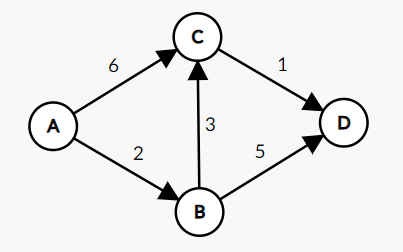

In [31]:
# Grap Realization 
graph = {}

# 1. Describe all nodes and their neighbors
graph['A'] = {'C': 6, 'B': 2} # neighbors of node A
graph['B'] = {'C': 3, 'D': 5}
graph['C'] = {'D': 1}
graph['D'] = {} # has no neighbors

In [32]:
# Neighbors of node A
list(graph['A'].keys())

['C', 'B']

In [33]:
# 2. Costs Table for all nodes 
# Nodes that are unreachable from the start node have inf value (because we don't know, assume very large)


inf = float('inf') # when time to reach the node is unknown  
costs = {}

costs['C'] = 6
costs['B'] = 2
costs['D'] = inf

In [34]:
# 3. Parent Node Table
parents = {}
parents['C'] = 'start'
parents['B'] = 'start'
parents['D'] = None

# 4. List of all processed nodes "processed" (see in dijkstra_algo function)

In [35]:
# Find node with the lowest cost 
def find_lowest_cost_node(costs):
    lowest_cost = float('inf') # initial cost value 
    lowest_cost_node = None # initial lowest node (unknown)
    for node in costs.keys(): # iterate over all nodes in costs
        current_cost = costs[node]
        if current_cost < lowest_cost and node not in processed:
            lowest_cost = current_cost
            lowest_cost_node = node
    return lowest_cost_node

In [39]:
def dijkstra_algo(graph, costs, parents, last_node_name='F'):
    global processed # find_lowest_cost_node() can see this variable
    processed = []
    node = find_lowest_cost_node(costs) # find a node with the lowest costs among unprocessed
    print('Current Node:', node)
    while node is not None:
        cost = costs[node]
        neighbors = graph[node]
        print('Neighbors: ', neighbors)
        for n in neighbors.keys(): # iterate over neigbors of a node with the lowest cost
            new_cost = cost + neighbors[n]
            if costs[n] > new_cost: # if lower cost found, update
                print('Update: ', n)
                costs[n] = new_cost
                parents[n] = node # new parent for a neighbor
        processed.append(node)
        node = find_lowest_cost_node(costs)
        print('Processed Nodes: ', processed)
        print('Next Lowest Node: ', node)
    print()
    print('Optimal Way: ', parents)
    print('Total Cost: ', costs[last_node_name])

In [40]:
dijkstra_algo(graph, costs, parents, last_node_name='D')

Current Node: B
Neighbors:  {'C': 3, 'D': 5}
Processed Nodes:  ['B']
Next Lowest Node:  C
Neighbors:  {'D': 1}
Processed Nodes:  ['B', 'C']
Next Lowest Node:  D
Neighbors:  {}
Processed Nodes:  ['B', 'C', 'D']
Next Lowest Node:  None

Optimal Way:  {'C': 'B', 'B': 'start', 'D': 'C'}
Total Cost:  6


### Another Example

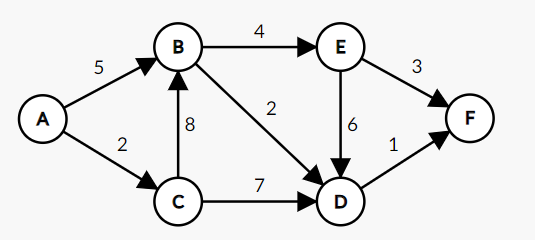

In [41]:
graph = {}
graph['A'] = {'B': 5, 'C': 2}
graph['B'] = {'E': 4, 'D': 2}
graph['C'] = {'B': 8, 'D': 7}
graph['D'] = {'F': 1}
graph['E'] = {'D': 6, 'F': 3}
graph['F'] = {}

In [42]:
costs = {}
costs['B'] = 5
costs['C'] = 2
costs['D'] = float('inf')
costs['E'] = float('inf')
costs['F'] = float('inf')

In [43]:
parents = {}
parents['B'] = 'start'
parents['C'] = 'start'
parents['D'] = None
parents['E'] = None
parents['F'] = None

In [44]:
dijkstra_algo(graph, costs, parents)

Current Node: C
Neighbors:  {'B': 8, 'D': 7}
Update:  D
Processed Nodes:  ['C']
Next Lowest Node:  B
Neighbors:  {'E': 4, 'D': 2}
Update:  E
Update:  D
Processed Nodes:  ['C', 'B']
Next Lowest Node:  D
Neighbors:  {'F': 1}
Update:  F
Processed Nodes:  ['C', 'B', 'D']
Next Lowest Node:  F
Neighbors:  {}
Processed Nodes:  ['C', 'B', 'D', 'F']
Next Lowest Node:  E
Neighbors:  {'D': 6, 'F': 3}
Processed Nodes:  ['C', 'B', 'D', 'F', 'E']
Next Lowest Node:  None

Optimal Way:  {'B': 'start', 'C': 'start', 'D': 'B', 'E': 'B', 'F': 'D'}
Total Cost:  8


### BinaryTree

### Tree Creation 

In the current implementation we cannot sort the values. So we create already sorted tree

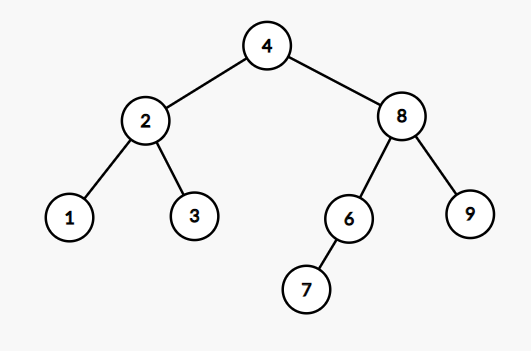

### Node Deletion
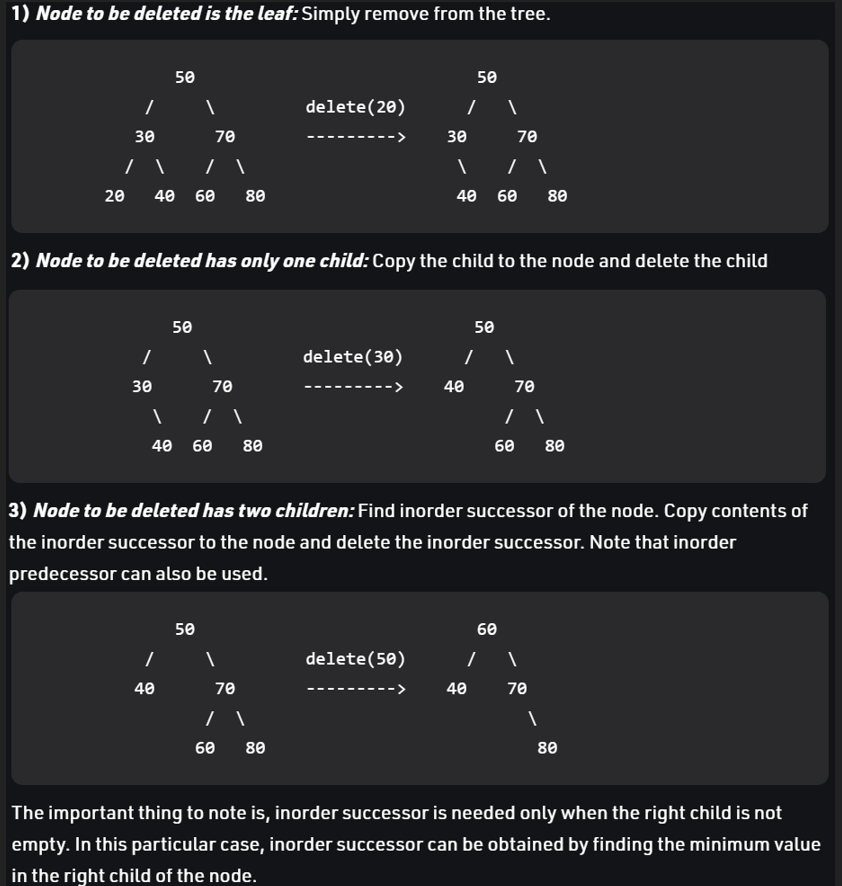


In [75]:
# Class for single node creation 
class Node():
    def __init__(self, value):
        """
        value - Value of the current node
        left - node's left value
        right - node's right value 
        """
        self.value = value # Node value
        self.left = None 
        self.right = None

# Main Tree Class
class BinaryTree():
    def __init__(self):
        self.node = None # have no root at the initialization (empty) 
    
    
    # New Node Inserting/Adding (Recursive way)
    def addNode(self, node, value):
        """
        node - CURRENT ALREADY EXISTING NODE 
        value - value of the current node 
        """
        
        if self.node is None:
            self.node = Node(value) # Tree root creation 
        else:
            if value < node.value: 
                if node.left is None: # If left node of the current node is empty
                    node.left = Node(value)
                else:
                    self.addNode(node.left, value) # Otherwise, recursively create a new node on the next level 
            else:
                if node.right is None:
                    node.right = Node(value)
                else:
                    self.addNode(node.right, value)
                    
                    
    def findMinMaxElement(self, node, how='max'):
        if how == 'max':
            current_node = node
            while current_node.right is not None:
                current_node = current_node.right
            return current_node.value
        
        if how == 'min':
            current_node = node
            while current_node.left is not None:
                current_node = current_node.left
            return current_node.value
        
        
    def findMinMaxNode(self, node, how='max'):
        if how == 'max':
            current_node = node
            while current_node.right is not None:
                current_node = current_node.right
            return current_node
        
        if how == 'min':
            current_node = node
            while current_node.left is not None:
                current_node = current_node.left
            return current_node
        
        
    # Node Deletion
    def deleteNode(self, node, value):
        if node is None:
            return node
        
        # if the deleted value is less than in the current tree node,
        # it 100% lies in the left subtree
        if value < node.value:
            node.left = self.deleteNode(node.left, value)
            
        # if the deleted value is more than in the current tree node,
        # it 100% lies in the right subtree
        elif value > node.value:
            node.right = self.deleteNode(node.right, value)
            
        # If value is same as node's value, then this is the node to be deleted
        else:
            
            # Option 1-2: node with only one child or no child (leaf):
            
            if node.left is None: # if has no left child 
                temp = node.right # keep right node 
                node = None # delete the found node 
                return temp # return right value node
            
            elif node.right is None: # if has no right child 
                temp = node.left
                node = None
                return temp
            
            # Option 3: node with two children
            # Get the inorder successor (smallest in the right subtree - max element in a tree)
            temp = self.findminMaxNode(node.right, how='min')
            
            # Copy the inorder successor's content to the deleting node 
            node.value = temp.value 
            
            # Delete the inorder successor
            node.right = self.deleteNode(node.right, temp.value)
        
        return node 
        
        
    # Tree Traversing Options 
    def preOrderPrint(self, node, traversal_way):
        """
        Check all left nodes first, then all right recursively
        """
        if node is not None:
            traversal_way += (str(node.value) + '-')
            traversal_way = self.preOrderPrint(node.left, traversal_way) # left first (recursion)
            traversal_way = self.preOrderPrint(node.right, traversal_way) # then right 
        return traversal_way
    
    
    def inOrderPrint(self, node, traversal_way):
        if node is not None:
            traversal_way = self.inOrderPrint(node.left, traversal_way)
            traversal_way += (str(node.value) + '-')
            traversal_way = self.inOrderPrint(node.right, traversal_way)
        return traversal_way
    
    
    def postOrderPrint(self, node, traversal_way):
        if node is not None:
            traversal_way = self.postOrderPrint(node.left, traversal_way)
            traversal_way = self.postOrderPrint(node.right, traversal_way)
            traversal_way += (str(node.value) + '-')
            
        return traversal_way
        
        
    def ifNodeExists(self, node, value):
        if node is None:
            return False
        
        if node.value == value:
            return True 
        
        # Recursively check all the left subtrees
        left_val = self.ifNodeExists(node.left, value)
        if left_val:
            return True
        
        # Recursively check all the right subtrees
        right_val = self.ifNodeExists(node.right, value)
        if right_val:
            return True
     
    def getTreeDepth(self, node):
        if node is None:
            return -1
        else:
            # Compute the depth of each subtree
            l_depth = self.getTreeDepth(node.left)
            r_depth = self.getTreeDepth(node.right)
            
            if l_depth > r_depth:
                return l_depth + 1
            else:
                return r_depth + 1

### Tree Creation

In [76]:
tree = BinaryTree()
tree.addNode(tree.node, 4)
tree.addNode(tree.node, 2)
tree.addNode(tree.node, 8)
tree.addNode(tree.node, 1)
tree.addNode(tree.node, 3)
tree.addNode(tree.node, 6)
tree.addNode(tree.node, 9)
tree.addNode(tree.node, 7)

### Tree levels Printing

In [23]:
print('Root Value: ', tree.node.value)
print('First lvl Values: ',  str(tree.node.left.value) + '-' + str(tree.node.right.value))
print('Second lvl Values: ', str(tree.node.left.left.value)  + '-' + \
                             str(tree.node.left.right.value) + '-' + \
                             str(tree.node.right.left.value) + '-' + \
                             str(tree.node.right.right.value))
print('Third lvl Values: ', str(tree.node.right.left.right.value))

Root Value:  4
First lvl Values:  2-8
Second lvl Values:  1-3-6-9
Third lvl Values:  7


### Tree Traversing Methods

In [24]:
print('Pre-Oreder Traversal: ', tree.preOrderPrint(tree.node, ''))
print('In-Order Traversal: ', tree.inOrderPrint(tree.node, ''))
print('Post-Order Traversal: ', tree.postOrderPrint(tree.node, ''))

Pre-Oreder Traversal:  4-2-1-3-8-6-7-9-
In-Order Traversal:  1-2-3-4-6-7-8-9-
Post-Order Traversal:  1-3-2-7-6-9-8-4-


### If Node Exists

In [36]:
tree.ifNodeExists(tree.node, value=9)

True

### MinMaxSearching

In [72]:
print('Max Tree Element: ', tree.findMinMaxElement(tree.node, how='max'))
print('Max Tree Element: ', tree.findMinMaxElement(tree.node, how='min'))

Max Tree Element:  9
Max Tree Element:  1


### Value Deletion

In [73]:
# Let's delete 2 (has two children)
tree.deleteNode(tree.node, value=2)

In [74]:
print('Pre-Oreder Traversal: ', tree.preOrderPrint(tree.node, ''))
print('In-Order Traversal: ', tree.inOrderPrint(tree.node, ''))
print('Post-Order Traversal: ', tree.postOrderPrint(tree.node, ''))

Pre-Oreder Traversal:  4-1-8-6-7-9-
In-Order Traversal:  1-4-6-7-8-9-
Post-Order Traversal:  1-7-6-9-8-4-


### Tree Depth 

In [79]:
print('Tree Depth: ', tree.getTreeDepth(tree.node))

Tree Depth:  3


In [236]:
# Array of values
tree = BinaryTree()
values = [44, 10, 66, 9, 3, 22, 11]
for val in values:
    tree.addNode(tree.node, val)
    
print('Pre-Oreder Traversal: ', tree.preOrderPrint(tree.node, ''))
print('In-Order Traversal: ', tree.inOrderPrint(tree.node, ''))
print('Post-Order Traversal: ', tree.postOrderPrint(tree.node, ''))

Pre-Oreder Traversal:  44-10-9-3-22-11-66-
In-Order Traversal:  3-9-10-11-22-44-66-
Post-Order Traversal:  3-9-11-22-10-66-44-
